## Importing Libraries

In [94]:
import numpy as np
import pandas as pd
import glob
import zipfile

## Loading Data

#### Training Data

In [95]:
df_training = pd.read_csv("datasets_hi4/train-data.csv", sep=';')
df_training.drop_duplicates(inplace=True)
print("le shape de mon training dataframe is ", df_training.shape)

print(len(df_training['id_product'].unique()))

le shape de mon training dataframe is  (1762970, 19)
244857


In [96]:
df_training['Reference proxy'] = df_training['Reference proxy'].apply(lambda x: int(x.replace('reference-', '')))
df_training['Product  Line proxy'] = df_training['Product  Line proxy'].apply(lambda x: int(x.replace('Product Line-', '')))
df_training['Division proxy'] = df_training['Division proxy'].apply(lambda x: int(x.replace('Division-', '')))
df_training['Customer Persona proxy'] = df_training['Customer Persona proxy'].apply(lambda x: int(x.replace('Customer Segmentation-', '')))
df_training['Strategic Product Family proxy'] = df_training['Strategic Product Family proxy'].apply(lambda x: int(x.replace('Strategic Product Family-', '')))

In [97]:
df_training[['Quarter', 'Year']] = df_training.Date.str.split(expand=True)

df_training['Year'] = df_training['Year'].astype(str)

df_training['Quarter'] = df_training['Quarter'].map({'jan-apr': 1, 'may-jul': 2, 'may-aug': 2, 'sep-dec': 3})
df_training['Year'] = df_training['Year'].astype(int)
df_training['Quarter_cumuled'] = (df_training['Quarter']-2) + (df_training['Year']-2020)*3

In [98]:
df_training['Site'] = df_training['Site'].map({'OOS_DRP': 'Unknown_Unknown_OOS_DRP'}).fillna(df_training['Site'])
site_det = df_training['Site'].str.split('_', expand=True)
site_det[2] = pd.Series(np.where(site_det[3].notna(), site_det[2]+' '+ site_det[3], site_det[2]))
df_training[['Site_country', 'Site_type', 'Site_complementary']] = site_det[[0, 1, 2]]
df_training.drop(['Site'], axis=1, inplace=True)

In [99]:
df_training['Month 1'] = df_training['Month 1'].fillna(df_training['Month 2'])
df_training['Product Life cycel status'] = df_training['Product Life cycel status'].map({'NPI': 3, 'EOL': 0, 'RaMPDOWN': 1}).fillna(2)

In [100]:
df_training['Month 1'] = df_training['Month 1'].apply(lambda x: int(str(x).replace(' ', '')))
df_training['Month 2'] = df_training['Month 2'].apply(lambda x: int(str(x).replace(' ', '')))
df_training['Month 3'] = df_training['Month 3'].apply(lambda x: int(str(x).replace(' ', '')))
df_training['Month 4'] = df_training['Month 4'].apply(lambda x: int(str(x).replace(' ', '')))

In [101]:
country_mapping = {'DE': 'Germany', 'CN': 'China', 'GB': 'United Kingdom', 'AU': 'Australia', 'ES': 'Spain', 'NL': 'Netherlands', 'US': 'United States', 'DK': 'Denmark', 'BE': 'Belgium', 'FR': 'France', 'IT': 'Italy', 'PL': 'Poland', 'SE': 'Sweden', 'TW': 'Taiwan', 'JP': 'Japan', 'HK': 'Hong Kong', 'KR': 'South Korea', 'PH': 'Philippines', 'MY': 'Malaysia', 'SG': 'Singapore', 'TH': 'Thailand', 'Id': 'Indonesia', 'FJ': 'Fiji', 'VN': 'Vietnam', 'BN': 'Brunei', 'NZ': 'New Zealand', 'MM': 'Myanmar', 'KH': 'Cambodia', 'MN': 'Mongolia', 'LA': 'Laos', 'PG': 'Papua New Guinea'}
df_training['Country'] = df_training['Country'].map(country_mapping)

In [102]:
df_training.head()

,index,id_product,Region,Country,Operations,Zone,Cluster,Reference proxy,Product Line proxy,Division proxy,...,Month 1,Month 2,Month 3,Month 4,Quarter,Year,Quarter_cumuled,Site_country,Site_type,Site_complementary
0,645874,156160,EUROPE,Germany,Europe Operations,DACH,Germany,13523,4,3,...,0,0,0,0,2,2021,3,NL,DC,Venray
1,469488,224631,CHINA,China,China Operations,China & HK,China,12778,4,3,...,0,1,0,0,1,2021,2,CN,DC,Shanghai
2,348904,104047,EUROPE,United Kingdom,Europe Operations,UK and Ireland,United Kingdom,3513,3,2,...,0,2,0,0,1,2021,2,NL,DC,HLD
3,1725822,11823,EAJP,Australia,International Operations,Pacific,Australia,672,1,1,...,0,0,0,0,1,2023,8,AU,DC,Perth
4,404781,159924,EUROPE,Spain,Europe Operations,Iberia,Spain,3496,3,2,...,0,0,0,0,1,2021,2,NL,DC,HLD


In [103]:
df_training.isna().sum()

index                                  0
id_product                             0
Region                                 0
Country                                0
Operations                             0
Zone                                   0
Cluster                                0
Reference proxy                        0
Product  Line proxy                    0
Division proxy                         0
Customer Persona proxy                 0
Strategic Product Family proxy         0
Product Life cycel status              0
Date                                   0
Month 1                                0
Month 2                                0
Month 3                                0
Month 4                                0
Quarter                                0
Year                                   0
Quarter_cumuled                        0
Site_country                           0
Site_type                              0
Site_complementary                282333
dtype: int64

In [104]:
### Adding a Year columns to the data set


#months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

#def get_Year(x) : 
    #return x.split(' ')[1]

#def get_MonthMin(x) : 
    #return x.split(' ')[0].split('-')[0]

#def get_MonthMax(x) : 
    #return x.split(' ')[0].split('-')[1]

#def get_Month2(x) :
    #return months[months.index(x) + 1]


#def get_Month3(x) :
    #return months[months.index(x) - 1]

#df_training['Year'] = df_training['Date'].apply(get_Year)



#df_training['Month_1'] = df_training['Date'].apply(get_MonthMin)
#df_training['Month_2'] = df_training['Month_1'].apply(get_Month2)
#df_training['Month_4'] = df_training['Date'].apply(get_MonthMax)
#df_training['Month_3'] = df_training['Month_4'].apply(get_Month3)
#print(df_training.shape)
#df_training.head()

### GSCPI Data

In [105]:
df_gscpi = pd.read_csv("datasets_hi4/extra-dataset/GSCPI_data.csv")
print("le shape de mon gscpi dataframe is ", df_gscpi.shape)
df_gscpi.head()

le shape de mon gscpi dataframe is  (43, 2)


,Year-Month,GSCPI
0,2020-01,0.090108
1,2020-02,1.191976
2,2020-03,2.546002
3,2020-04,3.161703
4,2020-05,2.537110


### LPI Extend Data

In [106]:
df_lpi = pd.read_csv("datasets_hi4/extra-dataset/LPIextend.csv")
print("le shape de mon gscpi dataframe is ", df_lpi.shape)
df_lpi.head()

le shape de mon gscpi dataframe is  (250, 26)


,Unnamed: 0,ID,Country,population (2023),area,landAreaKm,unMember,netChange,growthRate,worldPercentage,...,Infrastructure Score,Infrastructure Grouped Rank,International Shipments Score,International Shipments Grouped Rank,Logistics Competence and Quality Score,Logistics Competence and Quality Grouped Rank,Timeliness Score,Timeliness Grouped Rank,Tracking and Tracing Score,Tracking and Tracing Grouped Rank
0,0,0,Singapore,6014723.0,710.0,718.0,True,0.0012,0.0065,0.0008,...,4.6,1.0,4.0,2.0,4.4,1.0,4.3,1.0,4.4,1.0
1,1,1,Finland,5545475.0,338424.0,303940.0,True,0.0001,0.0009,0.0007,...,4.2,5.0,4.1,1.0,4.2,3.0,4.3,1.0,4.2,3.0
2,2,2,Denmark,5910913.0,43094.0,40000.0,True,0.0009,0.0049,0.0007,...,4.1,9.0,3.6,14.0,4.1,9.0,4.1,10.0,4.3,2.0
3,3,3,Germany,83294633.0,357114.0,349390.0,True,-0.0012,-0.0009,0.0104,...,4.3,3.0,3.7,8.0,4.2,3.0,4.1,10.0,4.2,3.0
4,4,4,Netherlands,17618299.0,41850.0,33670.0,True,0.0017,0.0031,0.0022,...,4.2,5.0,3.7,8.0,4.2,3.0,4.0,17.0,4.2,3.0


In [107]:
df_lpi.drop(['Unnamed: 0', 'ID'], axis=1, inplace=True)

In [108]:
df_lpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country                                        250 non-null    object 
 1   population (2023)                              234 non-null    float64
 2   area                                           234 non-null    float64
 3   landAreaKm                                     234 non-null    float64
 4   unMember                                       234 non-null    object 
 5   netChange                                      226 non-null    float64
 6   growthRate                                     234 non-null    float64
 7   worldPercentage                                228 non-null    float64
 8   density                                        234 non-null    float64
 9   densityMi                                      234 non

In [109]:
df_lpi.describe()

,population (2023),area,landAreaKm,netChange,growthRate,worldPercentage,density,densityMi,rank,LPI Grouped Rank,...,Infrastructure Score,Infrastructure Grouped Rank,International Shipments Score,International Shipments Grouped Rank,Logistics Competence and Quality Score,Logistics Competence and Quality Grouped Rank,Timeliness Score,Timeliness Grouped Rank,Tracking and Tracing Score,Tracking and Tracing Grouped Rank
count,2.340000e+02,2.340000e+02,2.340000e+02,226.000000,234.000000,228.000000,234.000000,234.000000,234.000000,139.000000,...,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.437442e+07,5.814500e+05,5.571123e+05,0.010306,0.009737,0.004407,451.288182,1168.836388,117.500000,66.589928,...,2.921583,66.856115,2.925180,66.561151,3.028777,67.194245,3.242446,67.143885,3.051079,67.079137
std,1.373864e+08,1.761841e+06,1.689972e+06,0.034774,0.012350,0.017375,1979.362419,5126.548664,67.694165,39.416360,...,0.720785,39.516381,0.523518,40.346886,0.645637,40.045966,0.565042,40.601557,0.675489,39.758157
min,5.180000e+02,4.400000e-01,4.400000e-01,-0.028600,-0.074500,0.000000,0.138000,0.357400,1.000000,1.000000,...,1.700000,1.000000,1.700000,1.000000,1.800000,1.000000,2.100000,1.000000,1.600000,1.000000
25%,4.225982e+05,2.650000e+03,2.625875e+03,0.000000,0.002325,0.000100,39.747650,102.946450,59.250000,34.000000,...,2.400000,30.000000,2.500000,26.000000,2.500000,33.000000,2.800000,35.000000,2.450000,34.000000
50%,5.643895e+06,8.119950e+04,7.568925e+04,0.000900,0.008200,0.000750,97.481000,252.475800,117.500000,66.000000,...,2.700000,68.000000,2.900000,68.000000,2.900000,65.000000,3.200000,65.000000,3.000000,65.000000
75%,2.324537e+07,4.304258e+05,4.047876e+05,0.008000,0.016850,0.002925,242.928650,629.185350,175.750000,97.000000,...,3.600000,89.000000,3.400000,102.000000,3.600000,103.000000,3.600000,102.000000,3.600000,101.500000
max,1.428628e+09,1.709824e+07,1.637687e+07,0.418400,0.049800,0.178500,21402.705200,55433.006400,234.000000,139.000000,...,4.600000,139.000000,4.100000,140.000000,4.400000,140.000000,4.300000,139.000000,4.400000,140.000000


### World Bank Economy Data

In [110]:
df_worldEconomy = pd.read_csv("datasets_hi4/extra-dataset/worldbank_economic_data.csv")
#df_worldEconomy['Year'] = df_worldEconomy['Year'].astype(str)
print("le shape de mon gscpi dataframe is ", df_worldEconomy.shape)
df_worldEconomy.head()

le shape de mon gscpi dataframe is  (1064, 11)


,Country,Year,"Agriculture, forestry, and fishing, value added (annual % growth)",Exports of goods and services (annual % growth),Final consumption expenditure (annual % growth),GDP (current US$),Gross capital formation (annual % growth),Imports of goods and services (annual % growth),"Industry (including construction), value added (annual % growth)","Manufacturing, value added (annual % growth)","Services, value added (annual % growth)"
0,Afghanistan,2020,5.94,NaN,NaN,2.014345e+10,NaN,NaN,-4.63,-3.54,-5.92
1,Afghanistan,2021,-2.83,NaN,NaN,1.458314e+10,NaN,NaN,-14.19,-7.22,-32.74
2,Afghanistan,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,2020,3.15,-11.41,-1.93,9.275933e+11,-8.37,-11.94,-4.86,-7.06,-3.05


In [111]:
df_worldEconomy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 11 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Country                                                            1064 non-null   object 
 1   Year                                                               1064 non-null   int64  
 2   Agriculture, forestry, and fishing, value added (annual % growth)  661 non-null    float64
 3   Exports of goods and services (annual % growth)                    541 non-null    float64
 4   Final consumption expenditure (annual % growth)                    561 non-null    float64
 5   GDP (current US$)                                                  741 non-null    float64
 6   Gross capital formation (annual % growth)                          527 non-null    float64
 7   Imports of goods and ser

In [112]:
df_worldEconomy.describe()

,Year,"Agriculture, forestry, and fishing, value added (annual % growth)",Exports of goods and services (annual % growth),Final consumption expenditure (annual % growth),GDP (current US$),Gross capital formation (annual % growth),Imports of goods and services (annual % growth),"Industry (including construction), value added (annual % growth)","Manufacturing, value added (annual % growth)","Services, value added (annual % growth)"
count,1064.00000,661.000000,541.000000,561.000000,7.410000e+02,527.000000,545.000000,660.000000,580.000000,658.000000
mean,2021.50000,1.491997,1.833641,2.263298,3.169917e+12,3.299715,3.315174,1.634636,1.145000,1.416824
std,1.11856,8.111301,22.285346,6.055425,1.050376e+13,41.152589,16.372478,11.198461,8.870702,7.489096
min,2020.00000,-32.360000,-74.420000,-27.510000,5.174657e+07,-277.920000,-61.940000,-43.150000,-55.170000,-56.060000
25%,2020.75000,-1.010000,-9.160000,-1.360000,1.181391e+10,-6.350000,-8.150000,-3.027500,-3.275000,-2.560000
50%,2021.50000,2.040000,4.300000,3.140000,6.838084e+10,2.830000,5.460000,1.930000,2.460000,3.040000
75%,2022.25000,3.940000,11.000000,5.520000,7.864600e+11,10.045000,13.410000,5.310000,6.302500,5.820000
max,2023.00000,59.880000,207.460000,24.670000,1.005620e+14,740.260000,113.810000,162.670000,23.890000,46.840000


### World Bank Inflation

In [113]:
df_worldInfla = pd.read_csv("datasets_hi4/extra-dataset/worldbank_inflation_data.csv")
print("le shape de mon gscpi dataframe is ", df_worldInfla.shape)

#infla_countries = set(df_worldInfla['Country'].unique())
#train_countries = set(df_training['Country'].unique())

#print(train_countries - infla_countries)

df_worldInfla = pd.merge(df_worldInfla, df_gscpi, on='Year-Month', how='left')



df_worldInfla.head()

le shape de mon gscpi dataframe is  (8127, 4)


,Country,Year-Month,Energy Price Index,Headline Consumer Price Index,GSCPI
0,Afghanistan,2020-01,NaN,154.191402,0.090108
1,Afghanistan,2020-02,NaN,153.366469,1.191976
2,Afghanistan,2020-03,NaN,153.676014,2.546002
3,Afghanistan,2020-04,NaN,NaN,3.161703
4,Afghanistan,2020-05,NaN,NaN,2.537110


In [114]:
def get_Date(x) : 
    year = x.split('-')[0]
    month = int(x.split('-')[1])

    if year == '2023' :
        if month > 4 : 
            return 'may-jul 2023'
        else : 
            return 'jan-apr 2023'
    
    if month <= 4 : 
        return 'jan-apr ' + year
    elif month > 4 and month <=8 : 
        return 'may-aug ' + year
    else : 
        return 'sep-dec ' + year

df_worldInfla['Date'] = df_worldInfla['Year-Month'].apply(get_Date)

result_df1 = df_worldInfla.groupby(['Country', 'Date'])['Energy Price Index'].apply(lambda x: x.tolist()).reset_index(name='Energy_Price_Index_List')
result_df2 = df_worldInfla.groupby(['Country', 'Date'])['Headline Consumer Price Index'].apply(lambda x: x.tolist()).reset_index(name='Headline_Consumer_Index_List')
result_df3 = df_worldInfla.groupby(['Country', 'Date'])['GSCPI'].apply(lambda x: x.tolist()).reset_index(name='GSCPI_List')

print(result_df1.shape)
print(result_df2.shape)
print(result_df3.shape)

result_df1_expanded = result_df1['Energy_Price_Index_List'].apply(pd.Series)
result_df1_expanded = result_df1_expanded.rename(columns=lambda x: f'Energy_Price_Index_{x + 1}')

result_df2_expanded = result_df2['Headline_Consumer_Index_List'].apply(pd.Series)
result_df2_expanded = result_df2_expanded.rename(columns=lambda x: f'Headline_Consumer_Index_{x + 1}')

result_df3_expanded = result_df3['GSCPI_List'].apply(pd.Series)
result_df3_expanded = result_df3_expanded.rename(columns=lambda x: f'GSCPI_{x + 1}')

df_final1 = pd.concat([result_df1, result_df1_expanded], axis=1)
df_final2 = pd.concat([result_df2, result_df2_expanded], axis=1)
df_final3 = pd.concat([result_df3, result_df3_expanded], axis=1)

df_final = pd.merge(df_final1, df_final2, on = ['Country', 'Date'], how='inner')
df_final = pd.merge(df_final, df_final3, on = ['Country', 'Date'], how='inner')

df_final = df_final.drop(['Headline_Consumer_Index_List', 'Energy_Price_Index_List', 'GSCPI_List'], axis=1)

print(df_final.shape)
df_final.head(14)

(2079, 3)
(2079, 3)
(2079, 3)
(2079, 14)


,Country,Date,Energy_Price_Index_1,Energy_Price_Index_2,Energy_Price_Index_3,Energy_Price_Index_4,Headline_Consumer_Index_1,Headline_Consumer_Index_2,Headline_Consumer_Index_3,Headline_Consumer_Index_4,GSCPI_1,GSCPI_2,GSCPI_3,GSCPI_4
0,Afghanistan,jan-apr 2020,NaN,NaN,NaN,NaN,154.191402,153.366469,153.676014,NaN,0.090108,1.191976,2.546002,3.161703
1,Afghanistan,jan-apr 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.329892,1.908749,2.199072,2.682921
2,Afghanistan,jan-apr 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.567542,2.732736,2.750733,3.417682
3,Afghanistan,jan-apr 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.023994,-0.264112,-1.153952,-1.327040
4,Afghanistan,may-aug 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.537110,2.252427,2.742415,1.354547
5,Afghanistan,may-aug 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.981772,2.694348,2.922301,3.232759
6,Afghanistan,may-aug 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.637340,2.341098,1.771378,1.459910
7,Afghanistan,may-jul 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.544344,-1.085352,-0.831945,NaN
8,Afghanistan,sep-dec 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.615690,0.121514,0.740285,1.661260
9,Afghanistan,sep-dec 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.275933,3.808737,4.212181,4.293310


In [115]:
df_final[df_final['Country'] == 'Australia']

,Country,Date,Energy_Price_Index_1,Energy_Price_Index_2,Energy_Price_Index_3,Energy_Price_Index_4,Headline_Consumer_Index_1,Headline_Consumer_Index_2,Headline_Consumer_Index_3,Headline_Consumer_Index_4,GSCPI_1,GSCPI_2,GSCPI_3,GSCPI_4


In [116]:
df_final.isna().sum()

Country                        0
Date                           0
Energy_Price_Index_1         563
Energy_Price_Index_2         585
Energy_Price_Index_3         611
Energy_Price_Index_4         710
Headline_Consumer_Index_1    440
Headline_Consumer_Index_2    461
Headline_Consumer_Index_3    494
Headline_Consumer_Index_4    590
GSCPI_1                        0
GSCPI_2                        0
GSCPI_3                        0
GSCPI_4                      189
dtype: int64

In [117]:
df_final['GSCPI_4'] = df_final['GSCPI_4'].fillna(0)
df_final.isna().sum()

Country                        0
Date                           0
Energy_Price_Index_1         563
Energy_Price_Index_2         585
Energy_Price_Index_3         611
Energy_Price_Index_4         710
Headline_Consumer_Index_1    440
Headline_Consumer_Index_2    461
Headline_Consumer_Index_3    494
Headline_Consumer_Index_4    590
GSCPI_1                        0
GSCPI_2                        0
GSCPI_3                        0
GSCPI_4                        0
dtype: int64

In [118]:
#merge training + worldinfla + gscpi

#infla_countries = set(df_final['Country'].unique())
#train_countries = set(df_training['Country'].unique())

#countries_to_remove = train_countries - infla_countries

#df_filtered = df_training[~df_training['Country'].isin(countries_to_remove)]

df = pd.merge(df_training, df_final, on=['Country', 'Date'], how='left')

print(df_training.shape)
df.head()

(1762970, 24)


,index,id_product,Region,Country,Operations,Zone,Cluster,Reference proxy,Product Line proxy,Division proxy,...,Energy_Price_Index_3,Energy_Price_Index_4,Headline_Consumer_Index_1,Headline_Consumer_Index_2,Headline_Consumer_Index_3,Headline_Consumer_Index_4,GSCPI_1,GSCPI_2,GSCPI_3,GSCPI_4
0,645874,156160,EUROPE,Germany,Europe Operations,DACH,Germany,13523,4,3,...,109.501,110.149,108.170000,108.486000,109.013000,109.118000,2.981772,2.694348,2.922301,3.232759
1,469488,224631,CHINA,China,China Operations,China & HK,China,12778,4,3,...,100.900,100.900,129.344851,130.113998,129.473043,129.088469,1.329892,1.908749,2.199072,2.682921
2,348904,104047,EUROPE,United Kingdom,Europe Operations,UK and Ireland,United Kingdom,3513,3,2,...,106.500,112.000,109.300000,109.400000,109.700000,110.400000,1.329892,1.908749,2.199072,2.682921
3,1725822,11823,EAJP,Australia,International Operations,Pacific,Australia,672,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,404781,159924,EUROPE,Spain,Europe Operations,Iberia,Spain,3496,3,2,...,102.303,106.463,104.500000,103.900000,104.900000,106.100000,1.329892,1.908749,2.199072,2.682921


In [119]:
df.isna().sum()

index                                  0
id_product                             0
Region                                 0
Country                                0
Operations                             0
Zone                                   0
Cluster                                0
Reference proxy                        0
Product  Line proxy                    0
Division proxy                         0
Customer Persona proxy                 0
Strategic Product Family proxy         0
Product Life cycel status              0
Date                                   0
Month 1                                0
Month 2                                0
Month 3                                0
Month 4                                0
Quarter                                0
Year                                   0
Quarter_cumuled                        0
Site_country                           0
Site_type                              0
Site_complementary                282333
Energy_Price_Ind

In [120]:
# + world bank
df = pd.merge(df, df_worldEconomy, on=['Country', 'Year'], how='left')
df.shape

(1762970, 45)

In [121]:
# + lpi
df = pd.merge(df, df_lpi, on=['Country'], how='left')
df.shape

(1762970, 68)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762970 entries, 0 to 1762969
Data columns (total 68 columns):
 #   Column                                                             Dtype  
---  ------                                                             -----  
 0   index                                                              int64  
 1   id_product                                                         int64  
 2   Region                                                             object 
 3   Country                                                            object 
 4   Operations                                                         object 
 5   Zone                                                               object 
 6   Cluster                                                            object 
 7   Reference proxy                                                    int64  
 8   Product  Line proxy                                                int64  
 9   Di

In [123]:
df['unMember'] = df['unMember'].astype(int) 

In [124]:
nan_counts = df.isna().sum()
nan_counts.to_csv('nan_counts.csv', index=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762970 entries, 0 to 1762969
Data columns (total 68 columns):
 #   Column                                                             Dtype  
---  ------                                                             -----  
 0   index                                                              int64  
 1   id_product                                                         int64  
 2   Region                                                             object 
 3   Country                                                            object 
 4   Operations                                                         object 
 5   Zone                                                               object 
 6   Cluster                                                            object 
 7   Reference proxy                                                    int64  
 8   Product  Line proxy                                                int64  
 9   Di

In [126]:
from sklearn.preprocessing import LabelEncoder

df = df.drop(['index','Operations', 'Site_complementary', 'Date'], axis=1)

string_columns = df.select_dtypes(include=['object']).columns

#Appliquer LabelEncoder à chaque colonne de type chaîne
for col in string_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [127]:
df = df.fillna(df.mean())

In [128]:
#to_drop = ['Site_complementary', 'Date', 'Operations', 'Site_type']
#df = df.drop(to_drop, axis=1)

In [129]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(df, test_size=0.2, random_state=1337)

y_training = train['Month 4']
y_valid = valid['Month 4']


train = train.drop(['Month 4'], axis=1)
valid = valid.drop(['Month 4'], axis=1)


print(train.shape)
print(valid.shape)
train.head()
print(y_valid.shape)


(1410376, 63)
(352594, 63)
(352594,)


In [41]:
%pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/63/ca/37b83f59b0efd919c03c52ad7e2473dced674f2f6eb07b9d6f7d80e4c54c/xgboost-2.0.2-py3-none-manylinux2014_x86_64.whl.metadata
  Using cached xgboost-2.0.2-py3-none-manylinux2014_x86_64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.2-py3-none-manylinux2014_x86_64.whl (297.1 MB)

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [132]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Créer l'instance du modèle XGBoost
model = xgb.XGBRegressor(objective ='reg:squarederror', enable_categorical=True)

# Entraîner le modèle
model.fit(train, y_training)

# Faire des prédictions
y_pred = model.predict(valid)

r2 = r2_score(y_valid, y_pred)
# Évaluer le modèle
mse = mean_squared_error(y_valid, y_pred)

print("r2 Score ", r2)
print(f"Erreur quadratique moyenne : {mse}")

# Utiliser le modèle pour prédire de nouvelles valeurs
# new_data est un nouveau DataFrame contenant les caractéristiques de nouvelles observations
# predictions = model.predict(new_data)

r2 Score  0.44152098586883193
Erreur quadratique moyenne : 222601.41271118366


In [133]:
model.feature_importances_

array([9.36823618e-03, 4.99628577e-03, 2.15490675e-03, 2.06413190e-03,
       0.00000000e+00, 7.25719426e-03, 2.92739575e-03, 7.37461611e-04,
       2.19298974e-02, 1.99844632e-02, 2.59861769e-03, 1.27995685e-02,
       1.55443056e-02, 4.03087288e-02, 1.53672062e-02, 3.05869803e-02,
       8.65541771e-03, 2.10400168e-02, 2.74622883e-03, 1.47592137e-02,
       1.47620924e-02, 8.25458393e-03, 4.34527593e-03, 2.73586251e-02,
       6.22622482e-03, 5.21389842e-02, 1.24123832e-02, 1.78576875e-02,
       1.91569887e-03, 6.20253384e-03, 1.76151178e-03, 7.22292345e-03,
       6.50644768e-03, 1.09170368e-02, 1.39901061e-02, 7.68722640e-03,
       7.62539264e-03, 1.07645541e-02, 2.07863445e-03, 2.03434061e-02,
       5.47326058e-02, 3.34494107e-04, 0.00000000e+00, 0.00000000e+00,
       3.75025696e-03, 7.97894038e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.12588611e-02, 5.11271006e-04,
       0.00000000e+00, 3.62646163e-01, 0.00000000e+00, 2.08762800e-03,
      

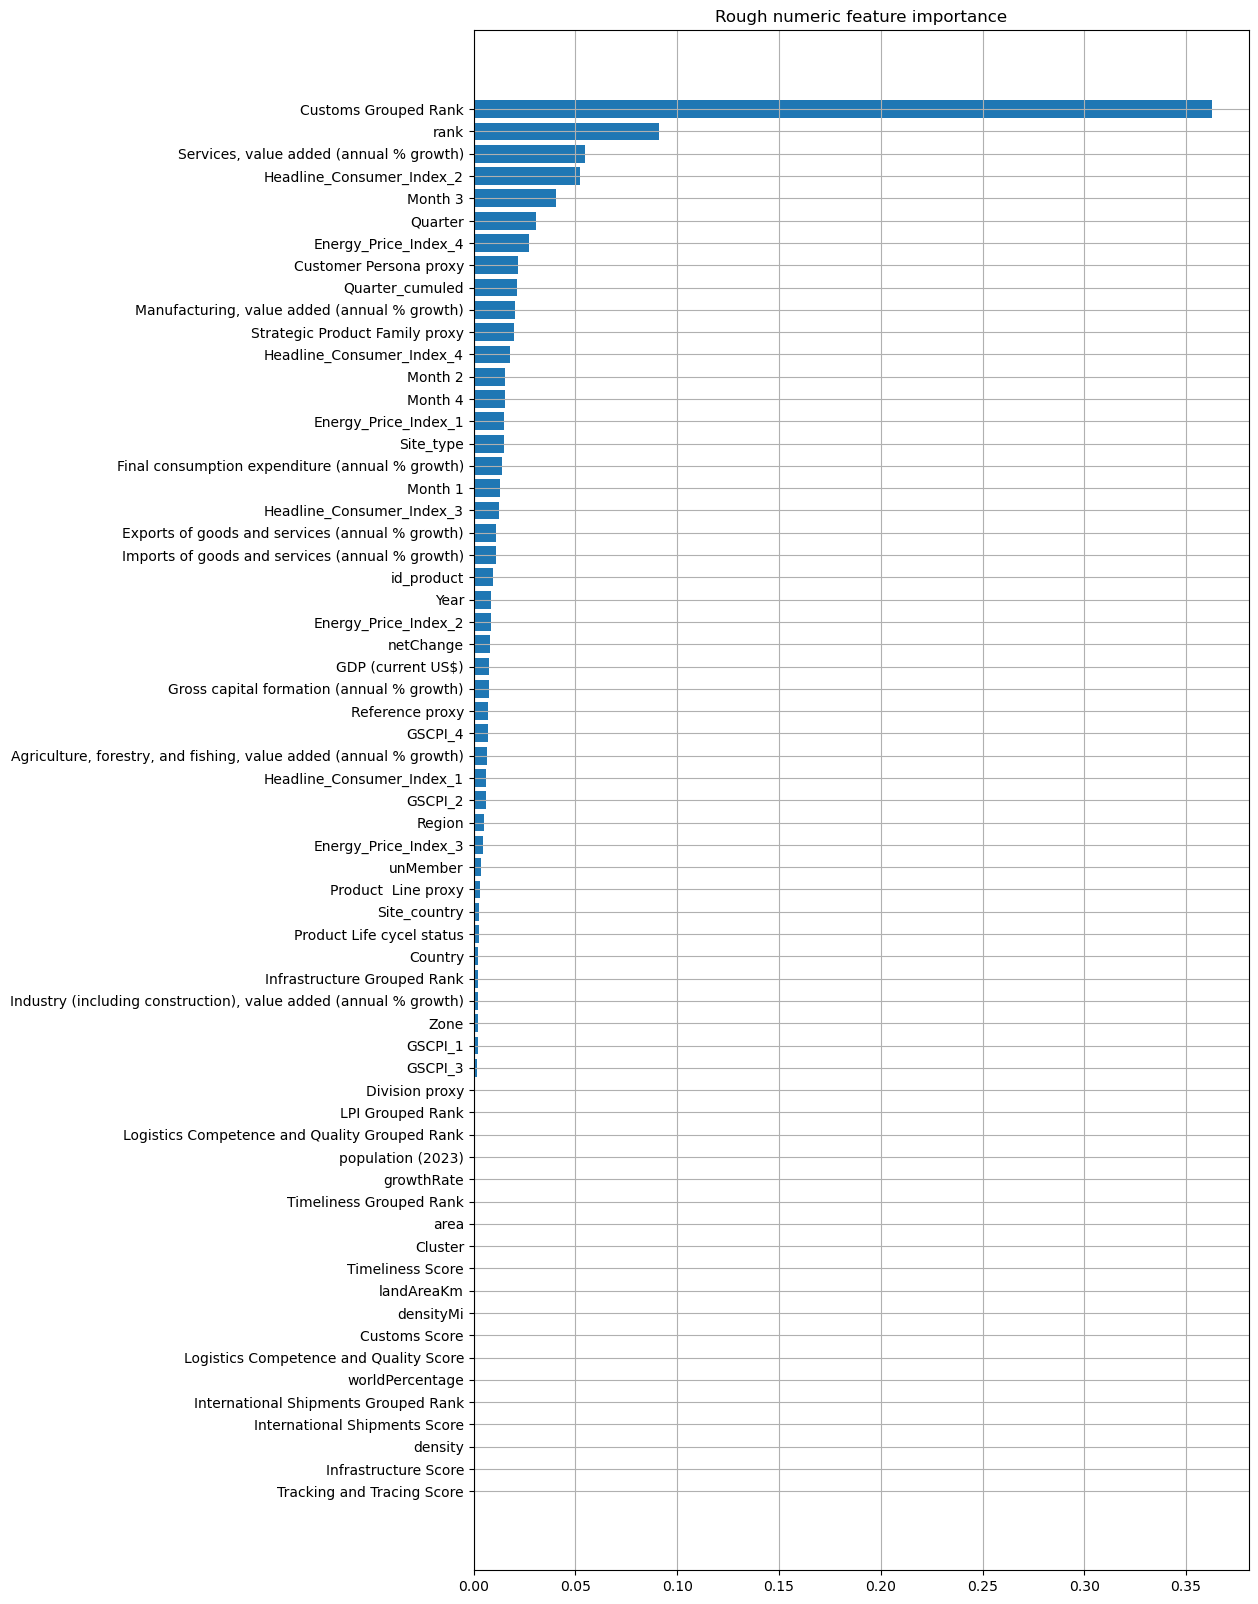

In [134]:
import matplotlib.pyplot as plt

column_names = df.columns

#Sort feature importances and retrieve corresponding indices.
sorted_idx = np.argsort(model.feature_importances_)
# Plot feature importances for better visualization
plt.figure(figsize=(10, 20))
plt.grid()
plt.barh(column_names[sorted_idx], model.feature_importances_[sorted_idx])
plt.title("Rough numeric feature importance")
plt.show()

In [135]:
non_important_columns = ['Tracking and Tracing Score', 'Infrastructure Score', 'density', 'International Shipments Score',
                        'worldPercentage', 'Logistics Competence and Quality Score', 'Customs Score', 'densityMi', 'landAreaKm'
                        , 'Timeliness Score', 'Cluster', 'area', 'Timeliness Grouped Rank', 'growthRate', 'population (2023)',
                        'Logistics Competence and Quality Grouped Rank', 'LPI Grouped Rank', 'Division proxy']

df.drop(non_important_columns, axis=1, inplace=True)

In [136]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(df, test_size=0.2, random_state=1337)

y_training = train['Month 4']
y_valid = valid['Month 4']


train = train.drop(['Month 4'], axis=1)
valid = valid.drop(['Month 4'], axis=1)


print(train.shape)
print(valid.shape)
train.head()
print(y_valid.shape)

(1410376, 45)
(352594, 45)
(352594,)


In [137]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Créer l'instance du modèle XGBoost
model = xgb.XGBRegressor(objective ='reg:squarederror', enable_categorical=True)

# Entraîner le modèle
model.fit(train, y_training)

# Faire des prédictions
y_pred = model.predict(valid)

r2 = r2_score(y_valid, y_pred)
# Évaluer le modèle
mse = mean_squared_error(y_valid, y_pred)

print("r2 Score ", r2)
print(f"Erreur quadratique moyenne : {mse}")

# Utiliser le modèle pour prédire de nouvelles valeurs
# new_data est un nouveau DataFrame contenant les caractéristiques de nouvelles observations
# predictions = model.predict(new_data)

r2 Score  0.4703753651101187
Erreur quadratique moyenne : 211100.48712670658


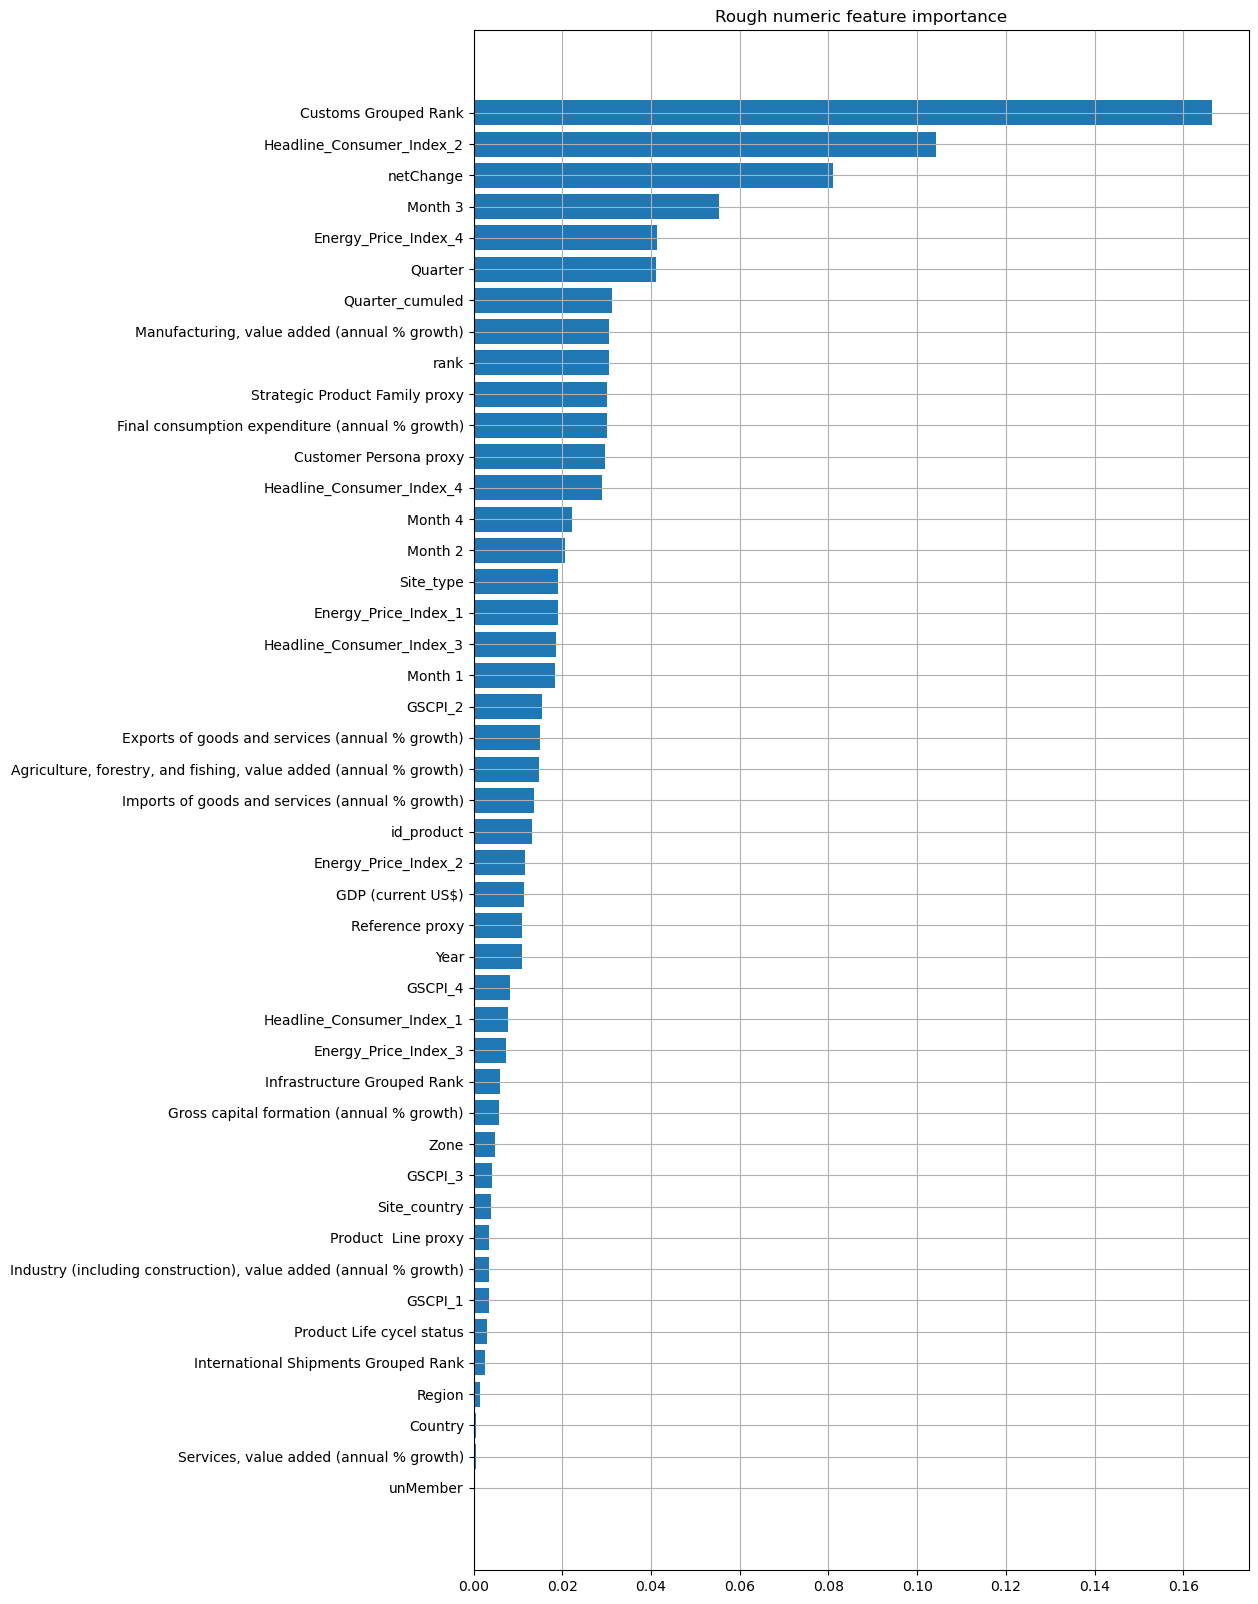

In [49]:
import matplotlib.pyplot as plt

column_names = df.columns

#Sort feature importances and retrieve corresponding indices.
sorted_idx = np.argsort(model.feature_importances_)
# Plot feature importances for better visualization
plt.figure(figsize=(10, 20))
plt.grid()
plt.barh(column_names[sorted_idx], model.feature_importances_[sorted_idx])
plt.title("Rough numeric feature importance")
plt.show()

In [53]:
has_negative_values = any(y < 0 for y in y_pred)
print(has_negative_values)

True


In [39]:
print(y_valid.mean())

26.37898594697632


In [40]:
print(y_pred.mean())

26.384367


## Test Data

In [138]:
df_test = pd.read_csv("datasets_hi4/X_test.csv", sep=';')
print("le shape de mon test dataframe is ", df_test.shape)

le shape de mon test dataframe is  (440743, 18)


In [139]:
df_test['Reference proxy'] = df_test['Reference proxy'].apply(lambda x: int(x.replace('reference-', '')))
df_test['Product  Line proxy'] = df_test['Product  Line proxy'].apply(lambda x: int(x.replace('Product Line-', '')))
df_test['Division proxy'] = df_test['Division proxy'].apply(lambda x: int(x.replace('Division-', '')))
df_test['Customer Persona proxy'] = df_test['Customer Persona proxy'].apply(lambda x: int(x.replace('Customer Segmentation-', '')))
df_test['Strategic Product Family proxy'] = df_test['Strategic Product Family proxy'].apply(lambda x: int(x.replace('Strategic Product Family-', '')))

In [140]:
df_test[['Quarter', 'Year']] = df_test.Date.str.split(expand=True)
df_test['Year'] = df_test['Year'].astype(str)
df_test['Quarter'] = df_test['Quarter'].map({'jan-apr': 1, 'may-jul': 2, 'may-aug': 2, 'sep-dec': 3})
df_test['Year'] = df_test['Year'].astype(int)
df_test['Quarter_cumuled'] = (df_test['Quarter']-2) + (df_test['Year']-2020)*3

In [141]:
df_test['Site'] = df_test['Site'].map({'OOS_DRP': 'Unknown_Unknown_OOS_DRP'}).fillna(df_test['Site'])
site_det = df_test['Site'].str.split('_', expand=True)
site_det[2] = pd.Series(np.where(site_det[3].notna(), site_det[2]+' '+ site_det[3], site_det[2]))
df_test[['Site_country', 'Site_type', 'Site_complementary']] = site_det[[0, 1, 2]]
df_test.drop(['Site'], axis=1, inplace=True)

In [142]:
df_test['Month 1'] = df_test['Month 1'].fillna(df_test['Month 2'])
df_test['Product Life cycel status'] = df_test['Product Life cycel status'].map({'NPI': 3, 'EOL': 0, 'RaMPDOWN': 1}).fillna(2)

In [143]:
df_test['Month 1'] = df_test['Month 1'].apply(lambda x: int(str(x).replace(' ', '')))
df_test['Month 2'] = df_test['Month 2'].apply(lambda x: int(str(x).replace(' ', '')))
df_test['Month 3'] = df_test['Month 3'].apply(lambda x: int(str(x).replace(' ', '')))

In [144]:
country_mapping = {'DE': 'Germany', 'CN': 'China', 'GB': 'United Kingdom', 'AU': 'Australia', 'ES': 'Spain', 'NL': 'Netherlands', 'US': 'United States', 'DK': 'Denmark', 'BE': 'Belgium', 'FR': 'France', 'IT': 'Italy', 'PL': 'Poland', 'SE': 'Sweden', 'TW': 'Taiwan', 'JP': 'Japan', 'HK': 'Hong Kong', 'KR': 'South Korea', 'PH': 'Philippines', 'MY': 'Malaysia', 'SG': 'Singapore', 'TH': 'Thailand', 'Id': 'Indonesia', 'FJ': 'Fiji', 'VN': 'Vietnam', 'BN': 'Brunei', 'NZ': 'New Zealand', 'MM': 'Myanmar', 'KH': 'Cambodia', 'MN': 'Mongolia', 'LA': 'Laos', 'PG': 'Papua New Guinea'}
df_test['Country'] = df_test['Country'].map(country_mapping)

In [145]:
df_test.head()

,index,id_product,Region,Country,Operations,Zone,Cluster,Reference proxy,Product Line proxy,Division proxy,...,Date,Month 1,Month 2,Month 3,Quarter,Year,Quarter_cumuled,Site_country,Site_type,Site_complementary
0,490548,834,EAJP,Australia,International Operations,Pacific,Australia,145,1,1,...,may-aug 2021,20435,610,4270,2,2021,3,AU,DC,Sydney
1,2167957,209101,EUROPE,France,France Operations,France,France,13121,4,3,...,may-jul 2023,0,0,0,2,2023,9,FR,DC,Evreux
2,1999013,40157,EAJP,New Zealand,International Operations,Pacific,New Zealand,3409,3,2,...,may-jul 2023,0,0,4,2,2023,9,AU,DC,ALD
3,469221,224364,CHINA,China,China Operations,China & HK,China,19450,4,3,...,jan-apr 2021,7,150,136,1,2021,2,CN,DC,Shanghai
4,1171716,192288,EUROPE,Belgium,Europe Operations,BeNe,Belgium,3686,3,2,...,jan-apr 2022,0,0,1,1,2022,5,NL,DC,HLD


In [49]:
df_test.isna().sum()

index                             0
id_product                        0
Region                            0
Country                           0
Operations                        0
Zone                              0
Cluster                           0
Reference proxy                   0
Product  Line proxy               0
Division proxy                    0
Customer Persona proxy            0
Strategic Product Family proxy    0
Product Life cycel status         0
Date                              0
Month 1                           0
Month 2                           0
Month 3                           0
Quarter                           0
Year                              0
Quarter_cumuled                   0
Site_country                      0
Site_type                         0
Site_complementary                0
dtype: int64

In [146]:
test = pd.merge(df_test, df_final, on=['Country', 'Date'], how='left')
print(test.shape)
test.head()

(440743, 35)


,index,id_product,Region,Country,Operations,Zone,Cluster,Reference proxy,Product Line proxy,Division proxy,...,Energy_Price_Index_3,Energy_Price_Index_4,Headline_Consumer_Index_1,Headline_Consumer_Index_2,Headline_Consumer_Index_3,Headline_Consumer_Index_4,GSCPI_1,GSCPI_2,GSCPI_3,GSCPI_4
0,490548,834,EAJP,Australia,International Operations,Pacific,Australia,145,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2167957,209101,EUROPE,France,France Operations,France,France,13121,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.544344,-1.085352,-0.831945,0.000000
2,1999013,40157,EAJP,New Zealand,International Operations,Pacific,New Zealand,3409,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,469221,224364,CHINA,China,China Operations,China & HK,China,19450,4,3,...,100.900,100.900,129.344851,130.113998,129.473043,129.088469,1.329892,1.908749,2.199072,2.682921
4,1171716,192288,EUROPE,Belgium,Europe Operations,BeNe,Belgium,3686,3,2,...,176.441,173.214,117.300000,118.000000,118.600000,119.000000,3.567542,2.732736,2.750733,3.417682


In [147]:
test.isna().sum()

index                                  0
id_product                             0
Region                                 0
Country                                0
Operations                             0
Zone                                   0
Cluster                                0
Reference proxy                        0
Product  Line proxy                    0
Division proxy                         0
Customer Persona proxy                 0
Strategic Product Family proxy         0
Product Life cycel status              0
Date                                   0
Month 1                                0
Month 2                                0
Month 3                                0
Quarter                                0
Year                                   0
Quarter_cumuled                        0
Site_country                           0
Site_type                              0
Site_complementary                     0
Energy_Price_Index_1              119360
Energy_Price_Ind

In [148]:
test = pd.merge(test, df_worldEconomy, on=['Country', 'Year'], how='left')
test.shape

(440743, 44)

In [149]:
test.isna().sum()

index                                                                     0
id_product                                                                0
Region                                                                    0
Country                                                                   0
Operations                                                                0
Zone                                                                      0
Cluster                                                                   0
Reference proxy                                                           0
Product  Line proxy                                                       0
Division proxy                                                            0
Customer Persona proxy                                                    0
Strategic Product Family proxy                                            0
Product Life cycel status                                                 0
Date        

In [150]:
# + lpi
test = pd.merge(test, df_lpi, on=['Country'], how='left')
test.shape

(440743, 67)

In [151]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440743 entries, 0 to 440742
Data columns (total 67 columns):
 #   Column                                                             Non-Null Count   Dtype  
---  ------                                                             --------------   -----  
 0   index                                                              440743 non-null  int64  
 1   id_product                                                         440743 non-null  int64  
 2   Region                                                             440743 non-null  object 
 3   Country                                                            440743 non-null  object 
 4   Operations                                                         440743 non-null  object 
 5   Zone                                                               440743 non-null  object 
 6   Cluster                                                            440743 non-null  object 
 7   Reference p

In [ ]:
indexes = test['index']

test = test.drop(['index', 'Operations', 'Site_complementary'], axis=1)

test = test.drop(, axis=1)